# How to Run

In [1]:
"""
Run all code cells from top to bottom.
The entire notebook takes ~35 minutes to run
on an ml.g5.xlarge instance type,
and will emit a beep to signal its completion.

The drug targeted for prediction in Q3 can be set below.
Levonorgestrel has the most reviews in the dataset,
and is the default value so as to provide
the largest possible ratio compared to all other drugs.

"""


# Enter drug to predict in Q3
target_drug = 'Levonorgestrel'


# Data Loading

## Import Data

In [2]:
# Import libraries, functions, and dataset
from modules import *

# Load dataset
!pip3 install -U ucimlrepo 
from ucimlrepo import fetch_ucirepo

drug_reviews_drugs_com = fetch_ucirepo(id=462) 
df = drug_reviews_drugs_com.data.features
df


[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this la...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very li...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I h...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job ...",9,27-Nov-16,37
...,...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effects are severe sweating and depression. I have bee...",10,13-Sep-14,43
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention...",9,8-Oct-16,11
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decid...",8,15-Nov-10,7
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shoulder pain. After taking only 2, 75mg pills I was r...",1,28-Nov-11,20


## Data Cleaning

In [3]:
cleaned_df = clean_data(df)



********** Load Data ********************************

No. of Rows: 215063
No. of Columns: 6

********** Data Cleaning *****************************

No. of rows (After removing duplicates): 128759

No. of rows (After dropping null): 127920

No. of rows (After dropping invalid Conditions): 127560

********** Cleaning Review Data... *********************

No. of columns used for processing: 5

<Data View after Cleaning: First Few Instances>


,drugName,condition,review,cleaned_review,rating
9892,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I've tried many different products - my skin is extrem...","""I have severe cracked skin on my hands. I've tried many different products - my skin is extrem...",10
170388,A / B Otic,Otitis Media,"""These drops helped me so much. I was in severe pain for 8 days before I finally found a doctor ...","""These drops helped me so much. I was in severe pain for 8 days before I finally found doctor w...",10
18402,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavier - but at least the throbbing subsides. I always...","""It numbs the pain. It makes my ear feel heavier - but at least the throbbing subsides. I always...",10
10591,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I am NOT new to HIV or HIV treatment. I've known my status since 1994 (1st test). I have been t...","""I am NOT new to HIV or HIV treatment. I've known my status since 1994 (1st test). I have been t...",1
112230,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I got diagnosis very early, within 7 days after getting infected. Decided to start therapy righ...","""I got diagnosis very early, within days after getting infected. Decided to start therapy right...",10


## Label Conversion

In [4]:
q1_df, q3_df = convert_labels(cleaned_df, target_drug)


********** Label Distribution of Target Classes ************

Q1. Class Counts (label, row):
label
1    89714
0    37846
Name: count, dtype: int64

Q1. Data View: X Data


,drugName,condition,review,label
9892,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I've tried many different products - my skin is extrem...",1
170388,A / B Otic,Otitis Media,"""These drops helped me so much. I was in severe pain for 8 days before I finally found a doctor ...",1
18402,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavier - but at least the throbbing subsides. I always...",1




Q3. Class Counts (label, row):
label
0    122953
1      4607
Name: count, dtype: int64

Q3. Data View: X Train


,rating,review,label
9892,10,"""I have severe cracked skin on my hands. I've tried many different products - my skin is extrem...",0
170388,10,"""These drops helped me so much. I was in severe pain for 8 days before I finally found doctor w...",0
18402,10,"""It numbs the pain. It makes my ear feel heavier - but at least the throbbing subsides. I always...",0


# Q1. Can logistic regression predict drug ratings from user reviews?

## Q1. Splitting

In [5]:
X_train, X_test, y_train, y_test, q2_test_data = split_data(q1_df)



********** Splitting Data *****************************

Train Data:  (95670, 3)
Test Data:  (31890, 3)

Class Counts (label, row): Train
 label
1    67285
0    28385
Name: count, dtype: int64

Class Counts (label, row): Test
 label
1    22429
0     9461
Name: count, dtype: int64

Data View: X Train


,drugName,condition,review
0,Cymbalta,Chronic Pain,"""I had such terrible pain and lost my ability to walk. My Doctor put me on cymbalta and within ..."
1,Diethylpropion,Obesity,"""Hi, everyone I wanted to wait until I finish the entire bottle, before I came and did a review...."
2,Oseltamivir,Swine Flu,"""The medicine knocked my fever from 103 to 100 in just a few hours and the intense achiness went..."



Data View: X Test


,drugName,condition,review
0,Abreva,Herpes Simplex,"""I had a really big blister when I woke up and rushed to WalMart. The only one available was Abr..."
1,Gas-X,Gas,"""For years I suffered with horrible gas pains...Someone suggested gas x. Tried it and in seconds..."
2,Methadone,Chronic Pain,"""After five years of Methadone I am now reducing the doses from three per day to only two per da..."


## Q1. Preprocessing

In [6]:
X_train_processed = preprocess_data(X_train)



********** Preprocessing Data... ***********************

X Data Shape: (95670,)

Data View: X Data


0    cymbalta chronic pain i had such terribl pain and lost my abil to walk my doctor put me on cymba...
1    diethylpropion obes hi everyon i want to wait until i finish the entir bottl befor i came and di...
2    oseltamivir swine flu the medicin knock my fever from 103 to 100 in just a few hour and the inte...
dtype: object

## Q1. Model Training

In [7]:
q1_lr_model, vectorizer = fit_model(X_train_processed, y_train)



********** Training Model... ***************************


## Q1. Evaulation


********** Preprocessing Data... ***********************

X Data Shape: (31890,)

Data View: X Data


0    abreva herp simplex i had a realli big blister when i woke up and rush to walmart the onli one a...
1    gasx ga for year i suffer with horribl ga painssomeon suggest ga x tri it and in second the pain...
2    methadon chronic pain after five year of methadon i am now reduc the dose from three per day to ...
dtype: object


********** Getting Predictions *************************

********** Model Evaluation...**************************

Rating Prediction Confusion Matrix:



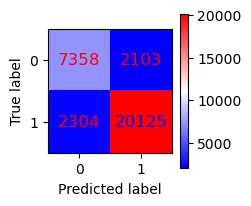


Rating Prediction Classification Report:



,precision,recall,f1-score,support
0,0.761540,0.777719,0.769545,9461.000000
1,0.905390,0.897276,0.901314,22429.000000
accuracy,0.861806,0.861806,0.861806,0.861806
macro avg,0.833465,0.837497,0.835429,31890.000000
weighted avg,0.862713,0.861806,0.862221,31890.000000


In [8]:
# Process and transform X_test data
X_test_processed = preprocess_data(X_test)
X_test_transformed = vectorizer.transform(X_test_processed)

print("\n********** Getting Predictions *************************")
predictions = q1_lr_model.predict(X_test_transformed)

# Evaluate model
evaluate_model(predictions, y_test, q1_lr_model, 'Rating Prediction')


# Q2. Are depression reviews easier to predict than other conditions?

## Q2. Split by Class

In [9]:
X_test_depression, y_test_depression, X_test_other, y_test_other, X_test_birth_control, y_test_birth_control = split_test_by_class(q2_test_data)



********** Splitting Data by Class **********************

Depression Data:  (2109, 3)
Non-Depression Data:  (29781, 3)
Birth Control Data:  (4890, 3)

Class Counts (label, row): Depression
 label
1    1537
0     572
Name: count, dtype: int64

Class Counts (label, row): Non-Depression
 label
1    20892
0     8889
Name: count, dtype: int64

Class Counts (label, row): Birth Control
 label
1    2822
0    2068
Name: count, dtype: int64

Data View: X Depression


,drugName,condition,review
0,Cymbalta,Depression,"""Best I've felt in a long time."""
1,Mirtazapine,Depression,"""I've been taking mirtazpine for about 4 years now for depression and insomnia, hearing voices. ..."
2,Mirtazapine,Depression,"""45 mg.Taking this med for depression and anxiety.Insomnia is my main issue. Mirtazapine doesn't..."



Data View: X Non-Depression


,drugName,condition,review
0,Abreva,Herpes Simplex,"""I had a really big blister when I woke up and rushed to WalMart. The only one available was Abr..."
1,Gas-X,Gas,"""For years I suffered with horrible gas pains...Someone suggested gas x. Tried it and in seconds..."
2,Methadone,Chronic Pain,"""After five years of Methadone I am now reducing the doses from three per day to only two per da..."



Data View: X Birth Control


,drugName,condition,review
0,Drospirenone / ethinyl estradiol,Birth Control,"""This was the second BC I have ever taken. It was absolutely terrible. I have always had light p..."
1,Ethinyl estradiol / norgestimate,Birth Control,"""38 years old. Using for 5 years. Virtually no acne. No weight gain. No pregnancies. Can't imagi..."
2,Ethinyl estradiol / norethindrone,Birth Control,"""Long before I took this I was really moody I did not like to be around anyone but now since I ..."


## Q2. Test Data Preprocessing

In [10]:
print("\n********** Preprocessing Depression Data... **************")
X_test_depression_processed = preprocess_data(X_test_depression)
X_test_depression_transformed = vectorizer.transform(X_test_depression_processed)

print("\n********** Preprocessing Non-Depression Data... **********")
X_test_other_processed = preprocess_data(X_test_other)
X_test_other_transformed = vectorizer.transform(X_test_other_processed)

print("\n********** Preprocessing Birth Control Data... ************")
X_test_birth_control_processed = preprocess_data(X_test_birth_control)
X_test_birth_control_transformed = vectorizer.transform(X_test_birth_control_processed)



********** Preprocessing Depression Data... **************

********** Preprocessing Data... ***********************

X Data Shape: (2109,)

Data View: X Data


0                                                          cymbalta depress best ive felt in a long time
1    mirtazapin depress ive been take mirtazpin for about 4 year now for depress and insomnia hear vo...
2    mirtazapin depress 45 mgtake thi med for depress and anxietyinsomnia is my main issu mirtazapin ...
dtype: object


********** Preprocessing Non-Depression Data... **********

********** Preprocessing Data... ***********************

X Data Shape: (29781,)

Data View: X Data


0    abreva herp simplex i had a realli big blister when i woke up and rush to walmart the onli one a...
1    gasx ga for year i suffer with horribl ga painssomeon suggest ga x tri it and in second the pain...
2    methadon chronic pain after five year of methadon i am now reduc the dose from three per day to ...
dtype: object


********** Preprocessing Birth Control Data... ************

********** Preprocessing Data... ***********************

X Data Shape: (4890,)

Data View: X Data


0    drospirenon ethinyl estradiol birth control thi wa the second bc i have ever taken it wa absolut...
1    ethinyl estradiol norgestim birth control 38 year old use for 5 year virtual no acn no weight ga...
2    ethinyl estradiol norethindron birth control long befor i took thi i wa realli moodi i did not l...
dtype: object

## Q2. Evaluation


********** Getting Predictions *************************

********** Depression Data Metrics *********************

********** Model Evaluation...**************************

Depression Confusion Matrix:



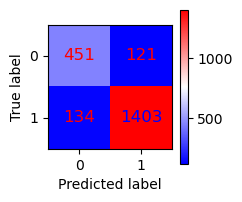


Depression Classification Report:



,precision,recall,f1-score,support
0,0.770940,0.788462,0.779602,572.00000
1,0.920604,0.912817,0.916694,1537.00000
accuracy,0.879090,0.879090,0.879090,0.87909
macro avg,0.845772,0.850639,0.848148,2109.00000
weighted avg,0.880012,0.879090,0.879512,2109.00000



********** Non-Depression Data Metrics *****************

********** Model Evaluation...**************************

Non-Depression Confusion Matrix:



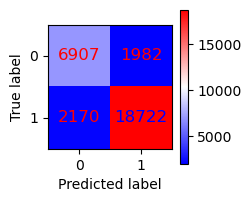


Non-Depression Classification Report:



,precision,recall,f1-score,support
0,0.760934,0.777028,0.768897,8889.000000
1,0.904270,0.896132,0.900183,20892.000000
accuracy,0.860582,0.860582,0.860582,0.860582
macro avg,0.832602,0.836580,0.834540,29781.000000
weighted avg,0.861487,0.860582,0.860997,29781.000000



********** Birth Control Data Metrics *******************

********** Model Evaluation...**************************

Birth Control Confusion Matrix:



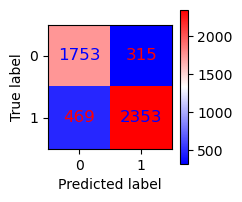


Birth Control Classification Report:



,precision,recall,f1-score,support
0,0.788929,0.847679,0.817249,2068.000000
1,0.881934,0.833806,0.857195,2822.000000
accuracy,0.839673,0.839673,0.839673,0.839673
macro avg,0.835431,0.840742,0.837222,4890.000000
weighted avg,0.842602,0.839673,0.840302,4890.000000


In [11]:
# Reload model from file
q2_lr_model_depression = load_model()
q2_lr_model_other = load_model()
q2_lr_model_birth_control = load_model()

print("\n********** Getting Predictions *************************")
depression_predictions = q2_lr_model_depression.predict(X_test_depression_transformed)
other_predictions = q2_lr_model_other.predict(X_test_other_transformed)
birth_control_predictions = q2_lr_model_birth_control.predict(X_test_birth_control_transformed)

print("\n********** Depression Data Metrics *********************")
evaluate_model(depression_predictions, y_test_depression, q2_lr_model_depression, 'Depression')

print("\n********** Non-Depression Data Metrics *****************")
evaluate_model(other_predictions, y_test_other, q2_lr_model_other, 'Non-Depression')

print("\n********** Birth Control Data Metrics *******************")
evaluate_model(birth_control_predictions, y_test_birth_control, q2_lr_model_birth_control, 'Birth Control')


# Q3. Can logistic regression predict a drug from its rating and review?

## Q3. Splitting

In [12]:
X_train, X_test, y_train, y_test, extraneous_q2_test_data = split_data(q3_df)



********** Splitting Data *****************************

Train Data:  (95670, 2)
Test Data:  (31890, 2)

Class Counts (label, row): Train
 label
0    92215
1     3455
Name: count, dtype: int64

Class Counts (label, row): Test
 label
0    30738
1     1152
Name: count, dtype: int64

Data View: X Train


,rating,review
0,10,"""I experienced unremittently high anxiety for almost year before trying this medication. Panic..."
1,1,"""Went on starter pack of . Am on second week now and hands are again horrible, swelling splitti..."
2,8,"""Worked quickly and well. I learned by trial that trimming/filing away dead pieces of nail once ..."



Data View: X Test


,rating,review
0,4,"""Irregular inconsistency on pain control . Many break thru pain through out day . Helps with lo..."
1,9,"""Day 3 of medication and pretty much all BV Symptoms are gone. Thank god!! Hopefully I'll never ..."
2,10,"""This is my second birth control pill. I have been taking for year and 3. months now and I lov..."


## Q3. Preprocessing

In [13]:
X_train_processed = preprocess_data(X_train)



********** Preprocessing Data... ***********************

X Data Shape: (95670,)

Data View: X Data


0    10 i experienc unremitt high anxieti for almost year befor tri thi medic panic attack at least e...
1    1 went on starter pack of am on second week now and hand are again horribl swell split open and ...
2    8 work quickli and well i learn by trial that trimmingfil away dead piec of nail onc week when r...
dtype: object

## Q3. Model Training

In [14]:
q3_lr_model, vectorizer = fit_model(X_train_processed, y_train)



********** Training Model... ***************************


## Q3. Evaluation


********** Preprocessing Data... ***********************

X Data Shape: (31890,)

Data View: X Data


0    4 irregular inconsist on pain control mani break thru pain through out day help with low pain an...
1    9 day 3 of medic and pretti much all bv symptom are gone thank god hope ill never need thi again...
2    10 thi is my second birth control pill i have been take for year and 3 month now and i love it i...
dtype: object


********** Getting Predictions *************************

********** Model Evaluation...**************************

Drug (Levonorgestrel) Prediction Confusion Matrix:



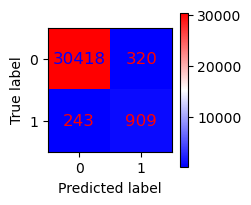


Drug (Levonorgestrel) Prediction Classification Report:



,precision,recall,f1-score,support
0,0.992075,0.989589,0.990830,30738.000000
1,0.739626,0.789062,0.763545,1152.000000
accuracy,0.982346,0.982346,0.982346,0.982346
macro avg,0.865850,0.889326,0.877188,31890.000000
weighted avg,0.982955,0.982346,0.982620,31890.000000


In [15]:
X_test_processed = preprocess_data(X_test)
X_test_transformed = vectorizer.transform(X_test_processed)

print("\n********** Getting Predictions *************************")
predictions = q3_lr_model.predict(X_test_transformed)

evaluate_model(predictions, y_test, q3_lr_model, f'Drug ({target_drug}) Prediction')


In [16]:
from IPython.display import Audio

def beep():
    """
    Beeps to alert the user when the notebook has finished running
    """
        
    # Generate a 1-second beep at 440 Hz (A4 note)
    framerate = 44100
    duration = 1
    frequency = 440
    
    t = np.linspace(0, duration, int(framerate * duration))
    data = np.sin(2 * np.pi * frequency * t)
    
    return Audio(data, rate=framerate, autoplay=True)

beep()